# Exemplo - Ambiente Quadrirrotor - v1

Olá! 
Aqui neste exemplo vou discutir a utilização do ambiente matemático do quadrirrotor. 

Neste caso, o arquivo principal que estamos utilizando está em ./environment/quadrotor_env

Se for testar em sua máquina, baixar esta pasta e todas suas subpastas.

Começando com o básico devemos inicializar a classe do ambiente, com as seguintes propriedades essenciais:

    t_step - Tempo de Integração do problema (em segundos)
    n - Número máximo de passos do sistema

In [38]:
import numpy as np
from environment.quadrotor_env import quad

t_step = 0.01
n = 2000
quad = quad(t_step, n, direct_control=1)

Com o ambiente inicializado, podemos começar a utilizar suas funções. 
As duas funções mais importantes do ambiente são:
    
        self.reset() - Reseta o ambiente para seu estado inicial
        self.passo(ação) - Dá um passo de tempo no ambiente com a ação

Toda vez que chamamos self.reset() a função retorna o estado inicial e a ação inicial (uma ação nula)

Toda vez que chamamos self.step(ação) a função retorna o estado do sistema após a ação, a recompensa desta ação e se o ambiente está em estado terminal. 

Quando o ambiente estiver em estado terminal, devemos finalizar a iteração e resetar o sistema, com a função self.reset()

Aqui temos um esboço simples para visualizar as saídas das funções do ambiente:

In [39]:
import numpy as np
from environment.quadrotor_env import quad, plotter

t_step = 0.01
n = 2
quad = quad(t_step, n, direct_control=1)
print(quad.reset())

done = False

while not done:
    action = np.array([0, 0, 0, 0])
    state, reward, done = quad.step(action)
    print(state, reward, done)


(array([[-2.00128719,  0.1447103 , -2.1079778 ,  1.1297979 ,  2.29045434,
         0.31118364,  0.97070543, -0.15071117, -0.00573627, -0.18704065,
        -0.00667204,  0.12898831,  0.17320946, -0.14387324]]), array([[0., 0., 0., 0.]]))
[[-1.9998176   0.14926125 -2.09653654  1.15840114  2.29354356  0.30667324
   0.97063569 -0.14941932 -0.00400527 -0.18847858 -0.00727532  0.12938223
   0.1729898  -0.14371266]] -0.19428320493013018 False
[[-1.99830089e+00  1.54132901e-01 -2.08481084e+00  1.18668421e+00
   2.29658807e+00  3.02243308e-01  9.70559924e-01 -1.48123532e-01
  -2.27648148e-03 -1.89914906e-01 -7.87860705e-03  1.29774617e-01
   1.72768079e-01 -1.43551862e-01]] -0.1896850808438728 True


Se seu algoritmo necessitar de informações matemáticas do modelo perfeito, aqui alguns parâmetros úteis:

    Estados do sistema (pos, vel, quat, vel ang) - self.state
    Matriz de rotação do sistema - self.mat_rot
    Forças aplicadas no sistema no sistema de coordenadas inercial - self.f_inertial
    Acceleração do sistema no sistema de coordenadas inercial - self.accel
    Velocidades angulares dos motores - self.w
    Condição terminal - self.done
    Angulos de Euler - self.ang

O ambiente tem a opção de inialização em estado não aleatório, passando o estado desejado como parâmetro da função self.reset():

In [40]:
import numpy as np
from environment.quadrotor_env import quad, plotter

t_step = 0.01
n = 2
quad = quad(t_step, n, direct_control=1)

env_in = np.array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])
print(quad.reset(env_in))

done = False

while not done:
    action = np.array([0, 0, 0, 0])
    state, reward, done = quad.step(action)
    print(state, reward, done)


(array([[1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0.]]))
[[1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] 0.0 False
[[1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] 0.0 True


## Ambiente plotter

Um outro ambiente que pode ser utilizado em conjunto é o ambiente de plot, facilitando o plot dos resultados. 

Devemos inicializar o ambiente de plot passando como argumento o ambiente matemático do quadrirrotor.

In [41]:
from environment.quadrotor_env import plotter
quad_plot = plotter(quad)

<Figure size 432x288 with 0 Axes>

Utilizando a função de plot em conjunto com o ambiente:

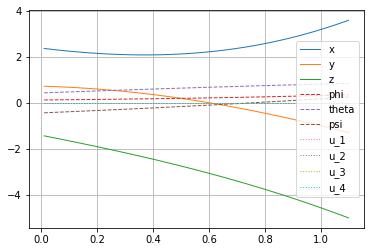

In [42]:
import numpy as np
from environment.quadrotor_env import quad, plotter

t_step = 0.01
n = 2000
quad = quad(t_step, n, direct_control=1)
quad_plot = plotter(quad)
states, _ = quad.reset()
quad_plot.add()
done = False

while not done:
    action = np.array([0, 0, 0, 0])
    states, _, done = quad.step(action)
    quad_plot.add()
quad_plot.plot()

É possível ter um plot3D, inicializando o ambiente de plot com o seguinte parâmetro adicional depth_plot=True:

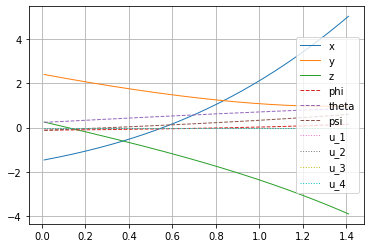

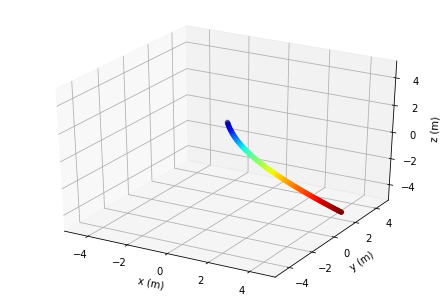

In [43]:
import numpy as np
from environment.quadrotor_env import quad, plotter

t_step = 0.01
n = 2000
quad = quad(t_step, n, direct_control=1)
quad_plot = plotter(quad, depth_plot=True)
states, _ = quad.reset()
quad_plot.add()
done = False

while not done:
    action = np.array([0, 0, 0, 0])
    states, _, done = quad.step(action)
    quad_plot.add()
quad_plot.plot()

## Ambiente de sensoriamento

Também há a possibilidade de utilizar um ambiente de sensoriamento. Este ambiente simula sensores reais no corpo do quadrirrotor, métodos de estimação de atitude e integradores numéricos.

Para declarar o ambiente de sensoriamento:

In [44]:
from environment.quadrotor_env import quad, sensor


t_step = 0.01
n = 5
quad_sens = sensor(quad)

Utilizando o integrador do baseado no acelerômetro, chamamos a função self.accel_int() **toda** iteração do problema, e assim obtemos a aceleração, velocidade e posição estimada do quadrirrotor pelo acelerômetro. 

In [45]:
from environment.quadrotor_env import quad, sensor

t_step = 0.01
n = 5
quad = quad(t_step, n, direct_control=1)
quad_sens = sensor(quad)

states, _ = quad.reset()
quad_sens.reset()

done = False

while not done:
    action = np.array([0, 0, 0, 0])
    states, _, done = quad.step(action)
    accel, vel, pos = quad_sens.accel_int()
    print(pos, states[0][0:5:2])

[ 1.37828598 -2.20399645  1.34352718] [ 1.37835627 -2.20408386  1.34350167]
[ 1.35912451 -2.22727636  1.33519184] [ 1.35935483 -2.22752989  1.33511387]
[ 1.34017034 -2.25092539  1.32675993] [ 1.34058145 -2.25133517  1.32662952]
[ 1.32145634 -2.27491993  1.31823319] [ 1.32203191 -2.27549874  1.31805008]
[ 1.30299957 -2.29924345  1.30961963] [ 1.30370202 -2.30001962  1.30937695]


De maneira análoga, podemos chamar a função self.gyro_int() para obter a posição angular do quadrirrotor estimada pelo giroscópio:

In [46]:
from environment.quadrotor_env import quad, sensor

t_step = 0.01
n = 5
quad = quad(t_step, n, direct_control=1)
quad_sens = sensor(quad)

states, _ = quad.reset()
quad_sens.reset()

done = False

while not done:
    action = np.array([0, 0, 0, 0])
    states, _, done = quad.step(action)
    q = quad_sens.gyro_int()
    print(q, states[0][-8:-4])

[ 0.94714576  0.24005321  0.11981606 -0.17589309] [ 0.94711227  0.24014405  0.11979818 -0.17594764]
[ 0.94772641  0.23925368  0.11791363 -0.17513957] [ 0.94762599  0.2393429   0.11787474 -0.17557195]
[ 0.94818211  0.23851703  0.1160917  -0.17489185] [ 0.94813473  0.23854259  0.11594992 -0.17519582]
[ 0.94865783  0.23776699  0.11409777 -0.17464738] [ 0.94863851  0.23774311  0.11402374 -0.17481927]
[ 0.94914785  0.23701785  0.11214314 -0.17426869] [ 0.94913732  0.23694447  0.1120962  -0.17444228]


Podemos também chamar o estimador por GPS, utilizando a função self.gps():

In [47]:
from environment.quadrotor_env import quad, sensor

t_step = 0.01
n = 5
quad = quad(t_step, n, direct_control=1)
quad_sens = sensor(quad)

states, _ = quad.reset()
quad_sens.reset()

done = False

while not done:
    action = np.array([0, 0, 0, 0])
    states, _, done = quad.step(action)
    pos, vel = quad_sens.gps()
    print(pos, states[0][0:5:2])

[ 0.20904993 -0.7872375   4.36113307] [-0.09731832  2.24912075  0.84834484]
[-3.61349323  1.42343974 -1.23134184] [-0.08049901  2.24705326  0.8711195 ]
[-3.83151517  4.3601338   4.50486562] [-0.06381457  2.24472103  0.89383406]
[-0.90550835  0.8770246   1.88138642] [-0.04726681  2.24212666  0.91648899]
[-0.18185708  3.76753192  1.74673466] [-0.03085754  2.23927273  0.93908474]


O ambiente de sensoriamento utiliza internamente o algoritmo TRIAD para a determinação da matriz de rotação do problema, importante para a estimação das acelerações no sistema de coordenadas inercial. Podemos recuperar esta matriz de rotação utilizando o seguinte comando:

In [48]:
from environment.quadrotor_env import quad, sensor

t_step = 0.01
n = 3
quad = quad(t_step, n, direct_control=1)
quad_sens = sensor(quad)

states, _ = quad.reset()
quad_sens.reset()

done = False

while not done:
    action = np.array([0, 0, 0, 0])
    states, _, done = quad.step(action)
    q, R = quad_sens.triad()
    print('Estimada: ')
    print(R)
    print('Real: ')
    print(quad.mat_rot)

Estimada: 
[[ 0.89368921 -0.33432892 -0.29923865]
 [ 0.36315813  0.9306496   0.04480512]
 [ 0.26350668 -0.14871281  0.95312577]]
Real: 
[[ 0.91515707 -0.26887977 -0.3003185 ]
 [ 0.29692764  0.95353103  0.05111316]
 [ 0.27261971 -0.13594943  0.9524685 ]]
Estimada: 
[[ 0.86760756 -0.36639015 -0.3361776 ]
 [ 0.39853273  0.91668051  0.02947043]
 [ 0.29736978 -0.15954654  0.94133741]]
Real: 
[[ 0.91353081 -0.2715473  -0.30285891]
 [ 0.30023074  0.95246957  0.05160649]
 [ 0.27445029 -0.13807168  0.95163714]]
Estimada: 
[[ 0.94435655 -0.1503154  -0.29256792]
 [ 0.18650041  0.97736894  0.09983761]
 [ 0.27093967 -0.14884634  0.95101864]]
Real: 
[[ 0.9118888  -0.27420754 -0.30539979]
 [ 0.30353128  0.95139685  0.05208445]
 [ 0.27627445 -0.14019362  0.9507987 ]]


Os parâmetros dos sensores podem ser alterados na inicialização do ambiente, alterando os valores padrões:
    
        accel_std - Desvio padrão do acelerômetro
        accel_bias_drift - Desvio máximo de tendência do acelerômetro
        gyro_std - Desvio padrão do giroscópio
        gyro_bias_drift - Desvio máximo de tendência do giroscópio
        magnet_std - Desvio padrão do magnetômetro
        magnet_bias_drift - Desvio máximo de tendência do magnetômetro
        gps_std_p - Desvio padrão do GPS na posição
        gps_std_v - Desvio padrão do GPS na velocidade
    
    